In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Importing Required Libraries**

In [ ]:
pip install boruta

     |████████████████████████████████| 61kB 3.5MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from boruta import BorutaPy

sns.set()

**Gathering Data**

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/BSc Project/insurance.csv')

In [ ]:
conditions = [
    (dataset['bmi'] < 18.5) ,
    (dataset['bmi'] <= 24.9) & (dataset['bmi'] >= 18.5),
    (dataset['bmi'] <= 29.9) & (dataset['bmi'] > 24.9),
    (dataset['bmi'] > 29.9),
]




choices = ['underweight', 'normal', 'overweight', 'obese']


dataset["bmiGps"] = np.select(condlist=conditions, choicelist=choices)
# dataset.drop(["bmi"], axis=1, inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [ ]:
ageconditions = [
    (dataset['age'] <= 35) & (dataset['age'] >= 18),
    (dataset['age'] <= 55) & (dataset['age'] > 35),
    (dataset['age'] > 55),
]




agechoices = ['young-adults', 'middle-aged-adults', 'elder-adults']


dataset["ageGps"] = np.select(condlist=ageconditions, choicelist=agechoices)
# dataset.drop(["bmi"], axis=1, inplace=True)
dataset.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps,ageGps
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,young-adults
1,18,male,33.770,1,no,southeast,1725.55230,obese,young-adults
2,28,male,33.000,3,no,southeast,4449.46200,obese,young-adults
3,33,male,22.705,0,no,northwest,21984.47061,normal,young-adults
4,32,male,28.880,0,no,northwest,3866.85520,overweight,young-adults


# **Contingency Table For The Most Important Features**

[https://www.geeksforgeeks.org/contingency-table-in-python/](https://)



In [ ]:
pd.crosstab([dataset.bmiGps, dataset.ageGps],
                             dataset.smoker, margins = False)


smoker                           no  yes
bmiGps      ageGps                      
normal      elder-adults         21    4
            middle-aged-adults   61   24
            young-adults         90   22
obese       elder-adults        107   25
            middle-aged-adults  235   61
            young-adults        227   61
overweight  elder-adults         46   11
            middle-aged-adults  135   27
            young-adults        127   34
underweight elder-adults          2    0
            middle-aged-adults    4    1
            young-adults          9    4

# **Chi-Squared Test(Statistical Filter Method)**

[https://machinelearningmastery.com/chi-squared-test-for-machine-learning/](https://)

**Pearson’s Chi-Squared Test Between BMI and Smoking Status**

In [ ]:
pd.crosstab(dataset.bmiGps,
                             dataset.smoker, margins = False)


smoker,no,yes
bmiGps,,
normal,172,50
obese,569,147
overweight,308,72
underweight,15,5


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
bmiSmokertable = (pd.crosstab(dataset.bmiGps,
                             dataset.smoker, margins = False)).to_numpy()
print(bmiSmokertable)
stat, p, dof, expected = chi2_contingency(bmiSmokertable)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[172  50]
 [569 147]
 [308  72]
 [ 15   5]]
dof=3
[[176.53811659  45.46188341]
 [569.37518685 146.62481315]
 [302.18236173  77.81763827]
 [ 15.90433483   4.09566517]]
probability=0.950, critical=7.815, stat=1.369
Independent (fail to reject H0)
significance=0.050, p=0.713
Independent (fail to reject H0)


**Pearson’s Chi-Squared Test Between BMI and Age**

In [ ]:
pd.crosstab(dataset.bmiGps,
                             dataset.ageGps, margins = False)


ageGps,elder-adults,middle-aged-adults,young-adults
bmiGps,,,
normal,25,85,112
obese,132,296,288
overweight,57,162,161
underweight,2,5,13


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
bmiAgetable = (pd.crosstab(dataset.bmiGps,
                             dataset.ageGps, margins = False)).to_numpy()
print(bmiAgetable)
stat, p, dof, expected = chi2_contingency(bmiAgetable)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[ 25  85 112]
 [132 296 288]
 [ 57 162 161]
 [  2   5  13]]
dof=6
[[ 35.83856502  90.92376682  95.23766816]
 [115.58744395 293.24962631 307.16292975]
 [ 61.34529148 155.63527653 163.01943199]
 [  3.22869955   8.19133034   8.5799701 ]]
probability=0.950, critical=12.592, stat=14.747
Dependent (reject H0)
significance=0.050, p=0.022
Dependent (reject H0)




---



**Preprocessing**

In [ ]:
#sex
le = LabelEncoder()
leBMI = LabelEncoder()
leRegion = LabelEncoder()
leSmoker = LabelEncoder()
le.fit(dataset.sex.drop_duplicates())
dataset.sex = le.transform(dataset.sex)
# smoker
leSmoker.fit(dataset.smoker.drop_duplicates())
dataset.smoker = leSmoker.transform(dataset.smoker)
#region
leRegion.fit(dataset.region.drop_duplicates())
dataset.region = leRegion.transform(dataset.region)
#BMI Groups
leBMI.fit(dataset.bmiGps.drop_duplicates())
dataset.bmiGps = leBMI.transform(dataset.bmiGps)
#age Groups
le.fit(dataset.ageGps.drop_duplicates())
dataset.ageGps = le.transform(dataset.ageGps)
dataset.head()


,age,sex,bmi,children,smoker,region,charges,bmiGps,ageGps
0,19,0,27.900,0,1,3,16884.92400,2,2
1,18,1,33.770,1,0,2,1725.55230,1,2
2,28,1,33.000,3,0,2,4449.46200,1,2
3,33,1,22.705,0,0,1,21984.47061,0,2
4,32,1,28.880,0,0,1,3866.85520,2,2


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,age,sex,bmi,children,smoker,region,charges,bmiGps,ageGps
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611,0.666667,1.0
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636,0.333333,1.0
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115,0.333333,1.0
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010,0.000000,1.0
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816,0.666667,1.0


In [ ]:
X = scaled_df.drop(["charges"], axis=1)
y = scaled_df.charges.values
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=0)

# **Feature Importance - Embedded Method**
[https://machinelearningmastery.com/calculate-feature-importance-with-python/](https://)

**Feature Importance Using Random Forest**

Feature: age, Score: 11.18626
Feature: sex, Score: 0.04957
Feature: bmi, Score: 16.58042
Feature: children, Score: 1.01551
Feature: smoker, Score: 68.57309
Feature: region, Score: 0.35660
Feature: bmiGps, Score: 1.23570
Feature: ageGps, Score: 1.00285


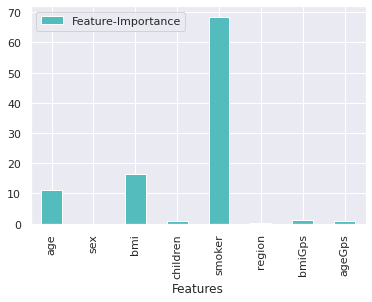

In [ ]:
rf_tuned = RandomForestRegressor(max_depth= 5, max_features=7, n_estimators=1000)
rf_tuned.fit(train_features, train_labels);
# R2-Score of the model and mean_squared_error
featureImportance = pd.DataFrame()
for i,v in enumerate(rf_tuned.feature_importances_):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v*100))
featureImportance["Feature-Importance"] = rf_tuned.feature_importances_*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#55bcbd")
plt.show()

**Feature Importance Using XGB**

[13:10:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: age, Score: 4.26921
Feature: sex, Score: 0.20522
Feature: bmi, Score: 8.53609
Feature: children, Score: 0.80288
Feature: smoker, Score: 85.06747
Feature: region, Score: 0.63015
Feature: bmiGps, Score: 0.48899
Feature: ageGps, Score: 0.00000


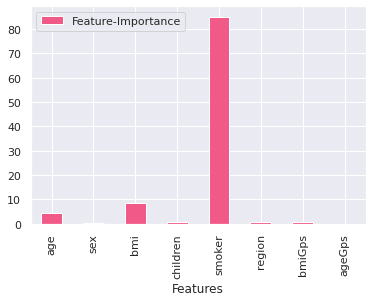

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(colsample_bytree=1,
 learning_rate=0.01,
 max_depth=3,
 n_estimators=500)
xgb_model.fit(train_features, train_labels);
featureImportance = pd.DataFrame()
for i,v in enumerate(xgb_model.feature_importances_):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v*100))
featureImportance["Feature-Importance"] = xgb_model.feature_importances_*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#f05988")
plt.show()

**Feature Importance Using Linear Regression**

Feature: age, Score: 19.20862
Feature: sex, Score: -0.03594
Feature: bmi, Score: 19.50100
Feature: children, Score: 3.46192
Feature: smoker, Score: 37.60067
Feature: region, Score: -1.39088
Feature: bmiGps, Score: -1.54406
Feature: ageGps, Score: 0.51504


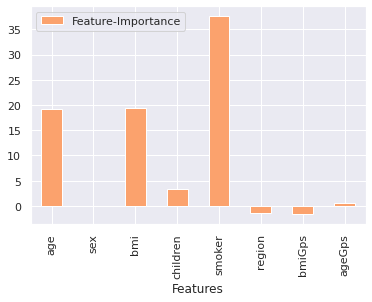

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
Lin_reg = LinearRegression()
Lin_reg.fit(train_features, train_labels)
featureImportance = pd.DataFrame()
for i,v in enumerate(Lin_reg.coef_):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v*100))
featureImportance["Feature-Importance"] = Lin_reg.coef_*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#fba26d")
plt.show()

**Feature Importance Using Ridge Regression**

Feature: age, Score: 18.61153
Feature: sex, Score: -0.02784
Feature: bmi, Score: 19.19298
Feature: children, Score: 3.49149
Feature: smoker, Score: 37.48672
Feature: region, Score: -1.36333
Feature: bmiGps, Score: -1.53710
Feature: ageGps, Score: 0.03741


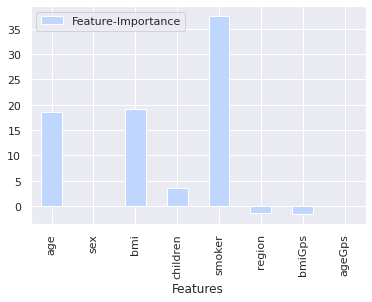

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(train_features, train_labels)
featureImportance = pd.DataFrame()
for i,v in enumerate(Ridge.coef_):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v*100))
featureImportance["Feature-Importance"] = Ridge.coef_*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#bfd6ff")
plt.show()

# **Permutation Feature Importance**

Feature: age, Score: 0.09057
Feature: sex, Score: 0.03458
Feature: bmi, Score: 0.06424
Feature: children, Score: 0.04183
Feature: smoker, Score: 1.45408
Feature: region, Score: 0.05612
Feature: bmiGps, Score: 0.08329
Feature: ageGps, Score: 0.06181


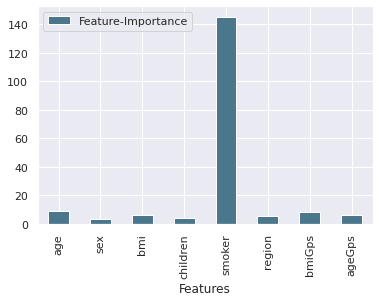

In [ ]:
from sklearn.linear_model import Ridge
knn = KNeighborsRegressor()
knn.fit(train_features, train_labels)
featureImportance = pd.DataFrame()
results = permutation_importance(knn, train_features, train_labels, scoring='r2')
# get importance
importance = results.importances_mean
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (train_features.columns[i],v))
featureImportance["Feature-Importance"] = importance*100
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Importance', kind = 'bar',color = "#4b778d")
plt.show()

# **Recursive Feature Elimination (RFE) - Wrapper Method**

[https://machinelearningmastery.com/rfe-feature-selection-in-python/](https://)

Column: 0: age => Selected True, Rank: 1.000
Column: 1: sex => Selected False, Rank: 4.000
Column: 2: bmi => Selected True, Rank: 1.000
Column: 3: children => Selected False, Rank: 2.000
Column: 4: smoker => Selected True, Rank: 1.000
Column: 5: region => Selected False, Rank: 3.000
Column: 6: bmiGps => Selected False, Rank: 5.000
Column: 7: ageGps => Selected False, Rank: 6.000


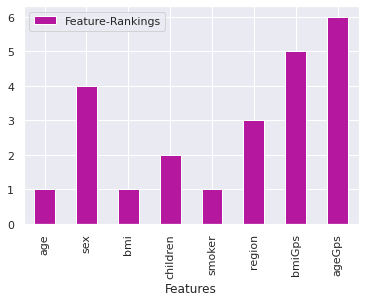

In [ ]:
rfe = RFECV(estimator=DecisionTreeRegressor())
# fit RFE
rfe.fit(train_features, train_labels)
# summarize all features
for i in range(train_features.shape[1]):
	print('Column: %d: %s => Selected %s, Rank: %.3f' % (i,train_features.columns[i], rfe.support_[i], rfe.ranking_[i]))
featureImportance = pd.DataFrame()
featureImportance["Feature-Rankings"] = rfe.ranking_
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Rankings', kind = 'bar',color = "#B5179E")
plt.show()

# **Boruta-wrapper Method (built around the random forest)**
[https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a](https://)

In [ ]:
#sex
le = LabelEncoder()
leRegion = LabelEncoder()
le.fit(dataset.sex.drop_duplicates())
dataset.sex = le.transform(dataset.sex)
# smoker
le.fit(dataset.smoker.drop_duplicates())
dataset.smoker = le.transform(dataset.smoker)
#region
leRegion.fit(dataset.region.drop_duplicates())
dataset.region = leRegion.transform(dataset.region)
#BMI Groups
le.fit(dataset.bmiGps.drop_duplicates())
dataset.bmiGps = le.transform(dataset.bmiGps)
#age Groups
le.fit(dataset.ageGps.drop_duplicates())
dataset.ageGps = le.transform(dataset.ageGps)
scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(d, columns=names)
X = scaled_df.drop(["charges"], axis=1)

y = scaled_df.charges.values
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=0)

selected features: ['age', 'bmi', 'smoker']


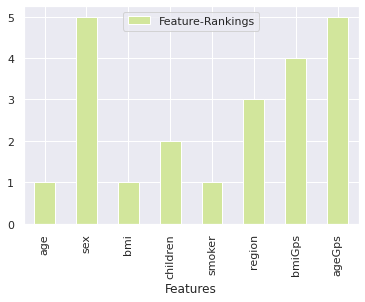

In [ ]:

forest = RandomForestRegressor(
   n_jobs = -1,
   max_depth = 5
)
boruta_selector = BorutaPy(
   estimator = forest,
   n_estimators = 'auto',
   max_iter = 100
)
boruta_selector.fit(np.array(train_features), np.array(train_labels))
green_area = train_features.columns[boruta_selector.support_].to_list()
print('selected features:', green_area)

featureImportance = pd.DataFrame()
featureImportance["Feature-Rankings"] = boruta_selector.ranking_
featureImportance["Features"] = train_features.columns
featureImportance.plot(x ='Features', y='Feature-Rankings', kind = 'bar',color = "#d2e69c")
plt.show()

